In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

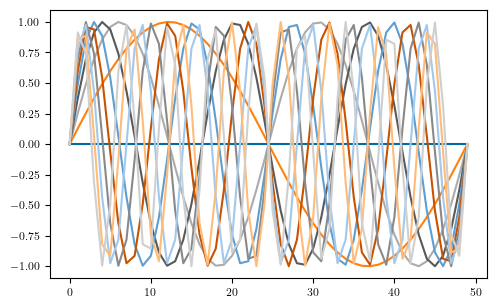

In [46]:
from os import path

# https://jwalton.info/Embed-Publication-Matplotlib-Latex/

PT_PER_INCH = 72.27
GOLDEN_RATIO = (5**.5 - 1) / 2

TEXTWIDTH_PT = 408.0 # \showthe\textwidth
TEXTWIDTH_IN = TEXTWIDTH_PT/PT_PER_INCH

REPORT_PATH = "report"
FIGURES_PATH = path.join("report", "figures")

def figsize(fraction=1.0, width=TEXTWIDTH_IN, ratio=GOLDEN_RATIO, subplots=(1, 1)):
    fig_width = fraction*width
    fig_height = fig_width*ratio*(subplots[0]/subplots[1])
    return fig_width, fig_height

def figpath(name):
    return path.join(FIGURES_PATH, f"{name}.pgf")

plt.style.use(["default", "tableau-colorblind10", "./thesis.mplstyle"])
plt.figure(figsize=figsize())
for i in range(10):
    plt.plot(np.sin(np.linspace(0, i*2*np.pi)))
plt.show()


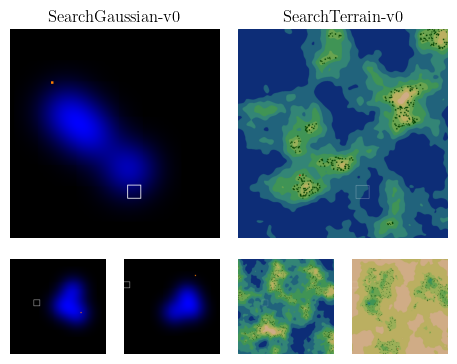

In [53]:
import gym
import gym_search

SEED = 0
ENV_IDS = ["SearchGaussian-v0", "SearchTerrain-v0"]
COUNT = 3

layout = [
    np.concatenate([[f"{env_id}-0"]*(COUNT-1) for env_id in ENV_IDS]),
    np.concatenate([[f"{env_id}-0"]*(COUNT-1) for env_id in ENV_IDS]),
    np.concatenate([[f"{env_id}-{i}"] for env_id in ENV_IDS for i in range(1, COUNT)]),
]

#fig, axs = plt.subplots(1, len(ENV_IDS))
fig, axs = plt.subplot_mosaic(layout, figsize=figsize(ratio=0.75, subplots=(3,3)))

for env_id in ENV_IDS:
    env = gym.make(env_id)
    env.seed(SEED)

    for j in range(COUNT):
        id = f"{env_id}-{j}"
        obs = env.reset()
        img = env.render(mode="rgb_array", show_view=True, show_targets=False, show_hits=False, show_path=False)

        axs[id].imshow(img)
        axs[id].set_title(env_id if j % COUNT == 0 else "")
        axs[id].set_axis_off()

fig.savefig(figpath("environments"), pad_inches=0.0)